In [1]:
import numpy as np
from matplotlib import pyplot as plt   
import matplotlib.pyplot as plt
import pandas as pd
import math
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import cv2
plt.style.use(astropy_mpl_style)
#plt.style.use("default")
#import sys
#sys.path.append('/Users/shaivi/mypy/')
import tvg
from matplotlib import pyplot, image, transforms
from scipy import ndimage
import skimage

from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
dopp = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_dopp1_index.fits')

num_scans = 59
dim = conti[1].data.shape
data_conti = np.zeros((dim[0], dim[1], num_scans))
data_magincl = np.zeros((dim[0], dim[1], num_scans))
data_Bz = np.zeros((dim[0], dim[1], num_scans))
#data_dopp = np.zeros((dim[0], dim[1], num_scans))

for i in range(num_scans):
    data_conti_temp = conti[i+1].data
    #data_conti_2=(data_conti_temp - data_conti_temp.min())*(255.0/(data_conti_temp - data_conti_temp.min()).max())
    #data_conti[:,:,i] = data_conti_2
    data_conti[:,:,i] = data_conti_temp
    np.save('/Users/shaivi/Downloads/test_conti.npy', data_conti)
   
    data_magincl_temp = magincl[i+1].data
    #data_magincl_2=(data_magincl_temp - data_magincl_temp.min())*(255.0/(data_magincl_temp - data_magincl_temp.min()).max())
    #data_magincl[:,:,i] = data_magincl_2
    data_magincl[:,:,i] = data_magincl_temp
    np.save('/Users/shaivi/Downloads/test_magincl.npy', data_magincl)

    data_magfield_temp = magfield[i+1].data
    Bz_temp =  data_magfield_temp*(np.cos(np.array(np.deg2rad(data_magincl_temp))))
    #data_Bz_2=(Bz_temp - Bz_temp.min())*(255.0/(Bz_temp - Bz_temp.min()).max())
    #data_Bz[:,:,i] = data_Bz_2
    data_Bz[:,:,i] = Bz_temp
    
    np.save('/Users/shaivi/Downloads/test_Bz.npy', data_Bz)
    
    #data_dopp_temp = dopp[i+1].data
    #data_dopp_2=(data_dopp_temp - data_dopp_temp.min())*(255.0/(data_dopp_temp - data_dopp_temp.min()).max())
    #data_dopp[:,:,i] = data_dopp_2
    #np.save('/Users/shaivi/Downloads/test_dopp1.npy', data_dopp)
    
dim = data_Bz.shape
alltogether = np.zeros((dim[0], dim[1]*3, dim[2]))
j = 0; alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_conti
j = 1 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_magincl
j = 2 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_Bz
#j = 3 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_dopp

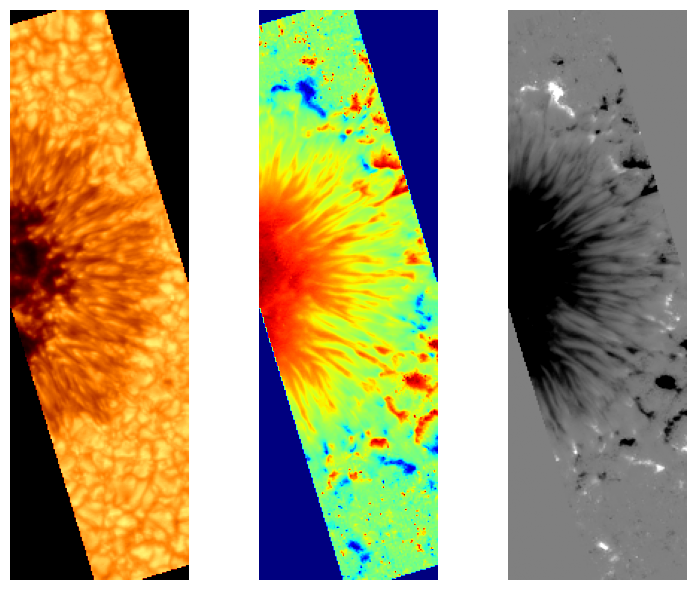

In [29]:
dc_rot = ndimage.rotate(data_conti, 17, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 17, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 17, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[:,:,0], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[0].set_axis_off()
ax[1].imshow(mi_rot[:,:,0], cmap='jet',  vmin=0, vmax=180)
ax[1].set_axis_off()
ax[2].imshow(bz_rot[:,:,0], cmap='gray', vmin=-1250, vmax=1250)
ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

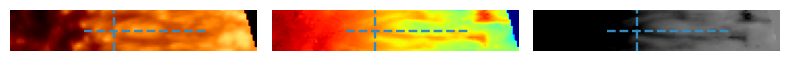

In [31]:
dc_rot = ndimage.rotate(data_conti, 17, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 17, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 17, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[165:185,:,0], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[0].set_axis_off()
ax[1].imshow(mi_rot[165:185,:,0], cmap='jet',  vmin=0, vmax=180)
ax[1].set_axis_off()
ax[2].imshow(bz_rot[165:185,:,0], cmap='gray', vmin=-1250, vmax=1250)
ax[2].set_axis_off()

#DRAWLINE
ax[0].axhline(y=10, xmin=0.3, xmax=0.8, linestyle = "--")
ax[0].axvline(x=50, ymin=0, ymax=1, linestyle = "--")
ax[1].axhline(y=10, xmin=0.3, xmax=0.8, linestyle = "--")
ax[1].axvline(x=50, ymin=0, ymax=1, linestyle = "--")
ax[2].axhline(y=10, xmin=0.3, xmax=0.8, linestyle = "--")
ax[2].axvline(x=50, ymin=0, ymax=1, linestyle = "--")

fig.set_layout_engine('tight')
plt.show()

#TWO ARE OVERLAPPING - maybe do not use - look farther

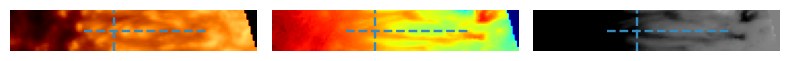

In [33]:
dc_rot = ndimage.rotate(data_conti, 17, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 17, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 17, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[165:185,:,1], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[0].set_axis_off()
ax[1].imshow(mi_rot[165:185,:,1], cmap='jet',  vmin=0, vmax=180)
ax[1].set_axis_off()
ax[2].imshow(bz_rot[165:185,:,1], cmap='gray', vmin=-1250, vmax=1250)
ax[2].set_axis_off()

#DRAWLINE
ax[0].axhline(y=10, xmin=0.3, xmax=0.8, linestyle = "--")
ax[0].axvline(x=50, ymin=0, ymax=1, linestyle = "--")
ax[1].axhline(y=10, xmin=0.3, xmax=0.8, linestyle = "--")
ax[1].axvline(x=50, ymin=0, ymax=1, linestyle = "--")
ax[2].axhline(y=10, xmin=0.3, xmax=0.8, linestyle = "--")
ax[2].axvline(x=50, ymin=0, ymax=1, linestyle = "--")

fig.set_layout_engine('tight')
plt.show()

#starting to separate.

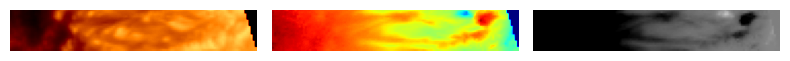

In [34]:
dc_rot = ndimage.rotate(data_conti, 17, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 17, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 17, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[165:185,:,2], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[0].set_axis_off()
ax[1].imshow(mi_rot[165:185,:,2], cmap='jet',  vmin=0, vmax=180)
ax[1].set_axis_off()
ax[2].imshow(bz_rot[165:185,:,2], cmap='gray', vmin=-1250, vmax=1250)
ax[2].set_axis_off()

#DRAWLINE
#ax[0].axhline(y=10, xmin=0.3, xmax=0.8, linestyle = "--")
#ax[0].axvline(x=50, ymin=0, ymax=1, linestyle = "--")
#ax[1].axhline(y=10, xmin=0.3, xmax=0.8, linestyle = "--")
#ax[1].axvline(x=50, ymin=0, ymax=1, linestyle = "--")
#ax[2].axhline(y=10, xmin=0.3, xmax=0.8, linestyle = "--")
#ax[2].axvline(x=50, ymin=0, ymax=1, linestyle = "--")

fig.set_layout_engine('tight')
plt.show()

#not very straightforward

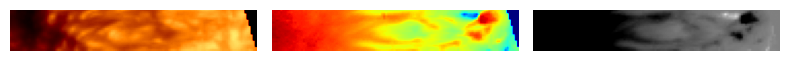

In [35]:
dc_rot = ndimage.rotate(data_conti, 17, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 17, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 17, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[165:185,:,3], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[0].set_axis_off()
ax[1].imshow(mi_rot[165:185,:,3], cmap='jet',  vmin=0, vmax=180)
ax[1].set_axis_off()
ax[2].imshow(bz_rot[165:185,:,3], cmap='gray', vmin=-1250, vmax=1250)
ax[2].set_axis_off()

#DRAWLINE
#ax[0].axhline(y=12, xmin=0.3, xmax=0.8, linestyle = "--")
#ax[0].axvline(x=50, ymin=0, ymax=1, linestyle = "--")
#ax[1].axhline(y=12, xmin=0.3, xmax=0.8, linestyle = "--")
#ax[1].axvline(x=50, ymin=0, ymax=1, linestyle = "--")
#ax[2].axhline(y=12, xmin=0.3, xmax=0.8, linestyle = "--")
#ax[2].axvline(x=50, ymin=0, ymax=1, linestyle = "--")

fig.set_layout_engine('tight')
plt.show()

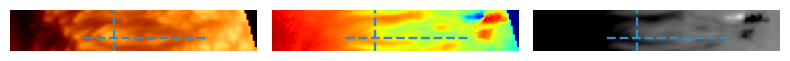

In [26]:
dc_rot = ndimage.rotate(data_conti, 17, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 17, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 17, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[165:185,:,4], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[0].set_axis_off()
ax[1].imshow(mi_rot[165:185,:,4], cmap='jet',  vmin=0, vmax=180)
ax[1].set_axis_off()
ax[2].imshow(bz_rot[165:185,:,4], cmap='gray', vmin=-1250, vmax=1250)
ax[2].set_axis_off()

#DRAWLINE
ax[0].axhline(y=13, xmin=0.3, xmax=0.8, linestyle = "--")
ax[0].axvline(x=50, ymin=0, ymax=1, linestyle = "--")
ax[1].axhline(y=13, xmin=0.3, xmax=0.8, linestyle = "--")
ax[1].axvline(x=50, ymin=0, ymax=1, linestyle = "--")
ax[2].axhline(y=13, xmin=0.3, xmax=0.8, linestyle = "--")
ax[2].axvline(x=50, ymin=0, ymax=1, linestyle = "--")

fig.set_layout_engine('tight')
plt.show()

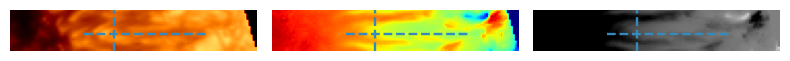

In [28]:
dc_rot = ndimage.rotate(data_conti, 17, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 17, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 17, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[165:185,:,5], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[0].set_axis_off()
ax[1].imshow(mi_rot[165:185,:,5], cmap='jet',  vmin=0, vmax=180)
ax[1].set_axis_off()
ax[2].imshow(bz_rot[165:185,:,5], cmap='gray', vmin=-1250, vmax=1250)
ax[2].set_axis_off()

#DRAWLINE
ax[0].axhline(y=11, xmin=0.3, xmax=0.8, linestyle = "--")
ax[0].axvline(x=50, ymin=0, ymax=1, linestyle = "--")
ax[1].axhline(y=11, xmin=0.3, xmax=0.8, linestyle = "--")
ax[1].axvline(x=50, ymin=0, ymax=1, linestyle = "--")
ax[2].axhline(y=11, xmin=0.3, xmax=0.8, linestyle = "--")
ax[2].axvline(x=50, ymin=0, ymax=1, linestyle = "--")

fig.set_layout_engine('tight')
plt.show()